In [52]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [53]:
df = pd.read_csv('heart_v2.csv')
df.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [54]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

In [55]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']
X,y

(     age  sex   BP  cholestrol
 0     70    1  130         322
 1     67    0  115         564
 2     57    1  124         261
 3     64    1  128         263
 4     74    0  120         269
 ..   ...  ...  ...         ...
 265   52    1  172         199
 266   44    1  120         263
 267   56    0  140         294
 268   57    1  140         192
 269   67    1  160         286
 
 [270 rows x 4 columns],
 0      1
 1      0
 2      1
 3      0
 4      0
       ..
 265    0
 266    0
 267    0
 268    0
 269    1
 Name: heart disease, Length: 270, dtype: int64)

In [56]:
# Train Test Split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((189, 4), (81, 4), (189,), (81,))

In [57]:
# Building the decision tree model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

In [58]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
from IPython.display import Image 
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

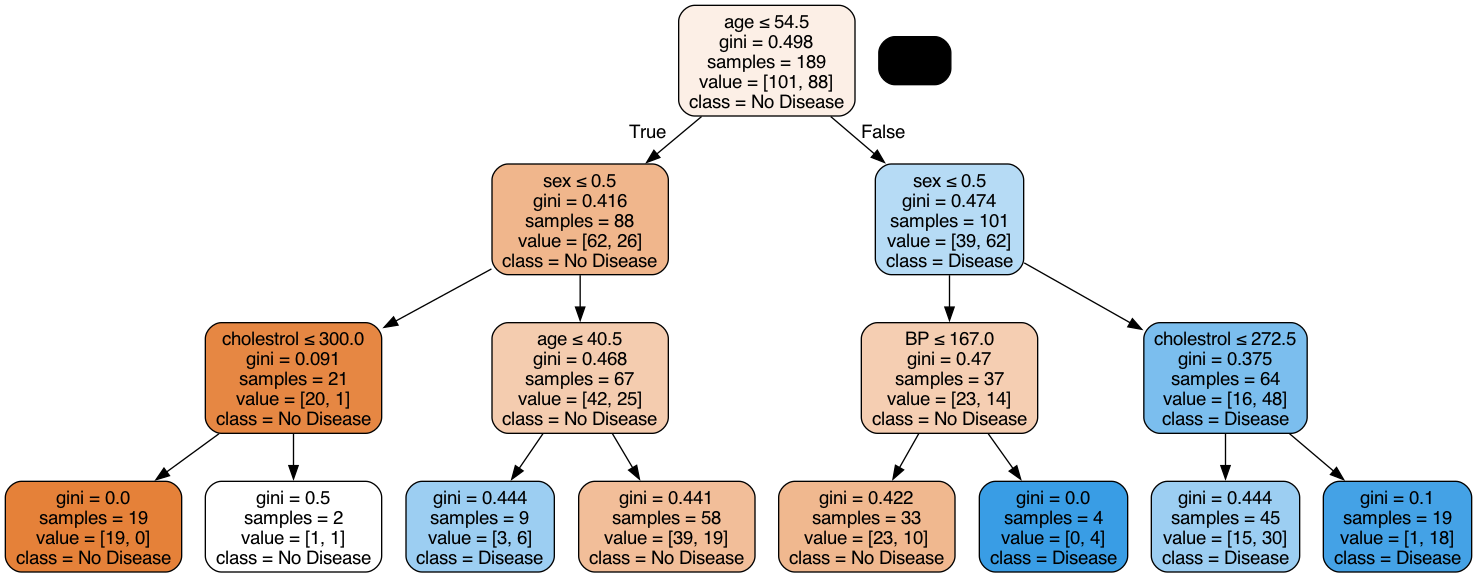

In [60]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns, class_names=['No Disease','Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [61]:
# Evaluating the model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.7407407407407407, 0.6049382716049383)

In [63]:
confusion_matrix(y_train, y_train_pred), confusion_matrix(y_test, y_test_pred)  

(array([[82, 19],
        [30, 58]]),
 array([[35, 14],
        [18, 14]]))

Create helper functions to evaluate the model performance and create the graph for DT

In [64]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, 
                    special_characters=True, feature_names=X.columns, class_names=['No Disease','Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [65]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("\nTrain Confusion Matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print("\nTest Confusion Matrix")
    print(confusion_matrix(y_test, y_test_pred))

In [66]:
evaluate_model(dt)

Train Accuracy:  0.7407407407407407
Test Accuracy:  0.6049382716049383

Train Confusion Matrix
[[82 19]
 [30 58]]

Test Confusion Matrix
[[35 14]
 [18 14]]


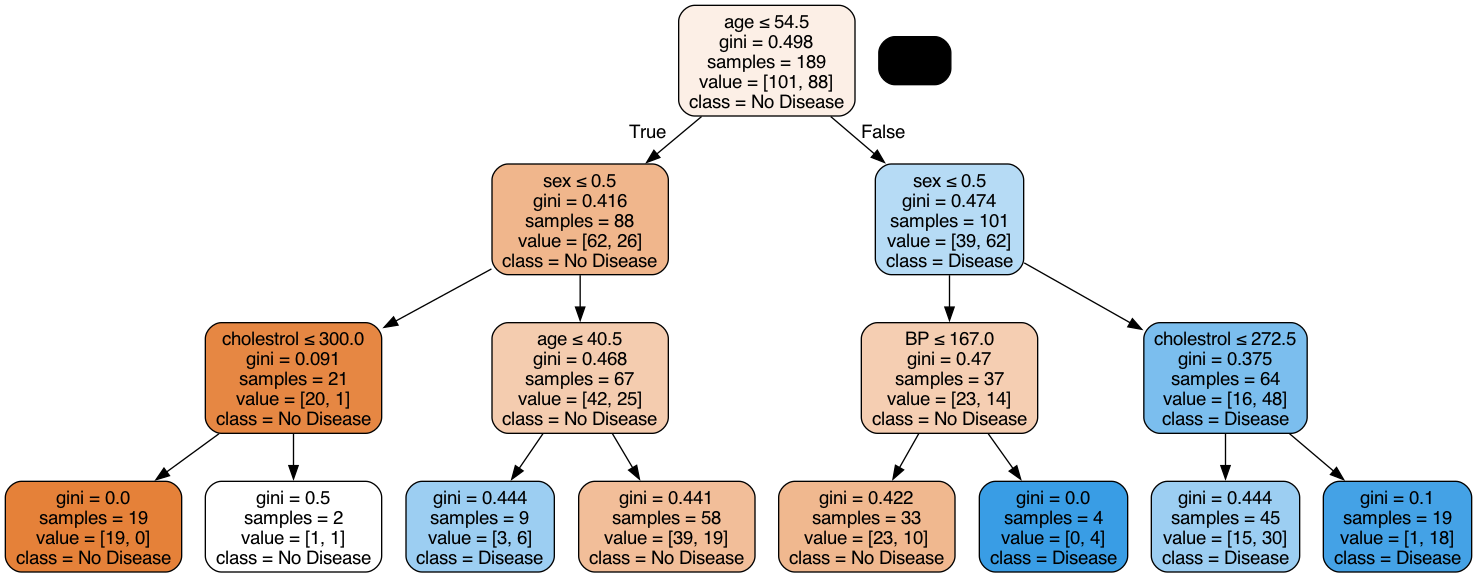

In [67]:
grph = get_dt_graph(dt)
Image(grph.create_png())

Decision tree without any hyper-parameter tuning

In [68]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

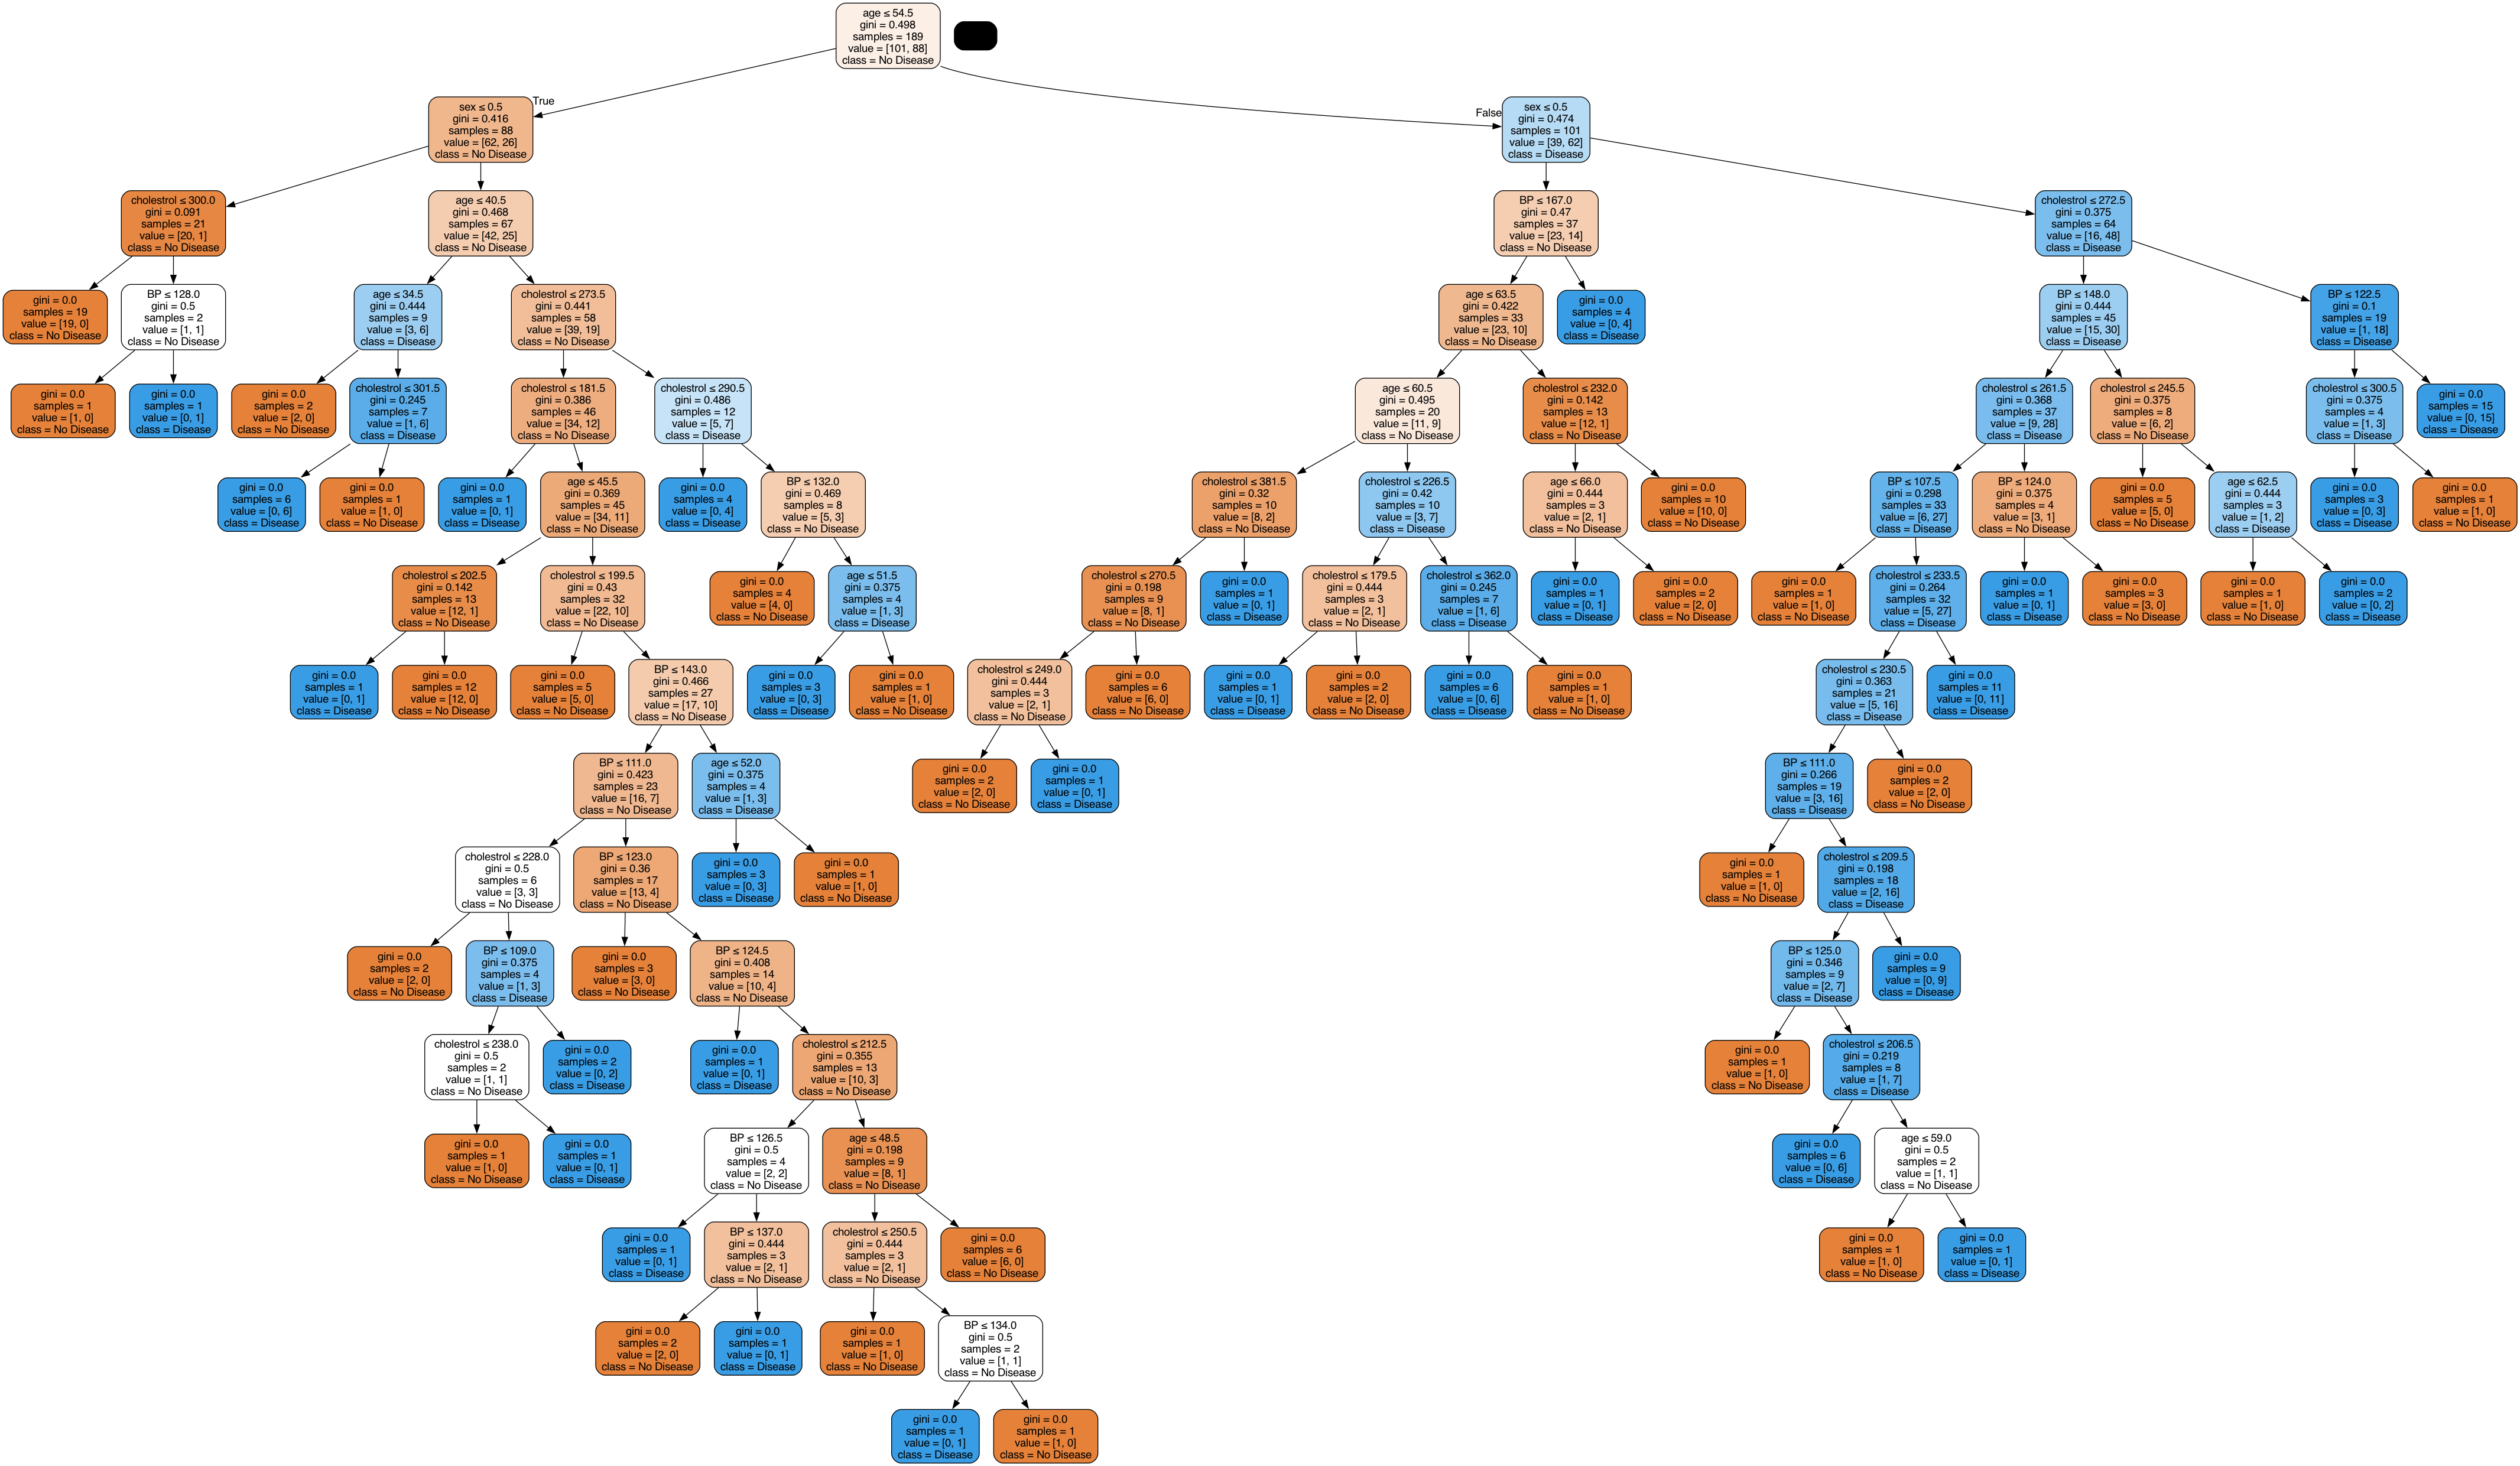

In [69]:
grph = get_dt_graph(dt_default)
Image(grph.create_png())

In [70]:
evaluate_model(dt_default)

Train Accuracy:  1.0
Test Accuracy:  0.6296296296296297

Train Confusion Matrix
[[101   0]
 [  0  88]]

Test Confusion Matrix
[[31 18]
 [12 20]]


We see that it is massively overfitting the train data

Controlling the depth of the tree

In [71]:
dt_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

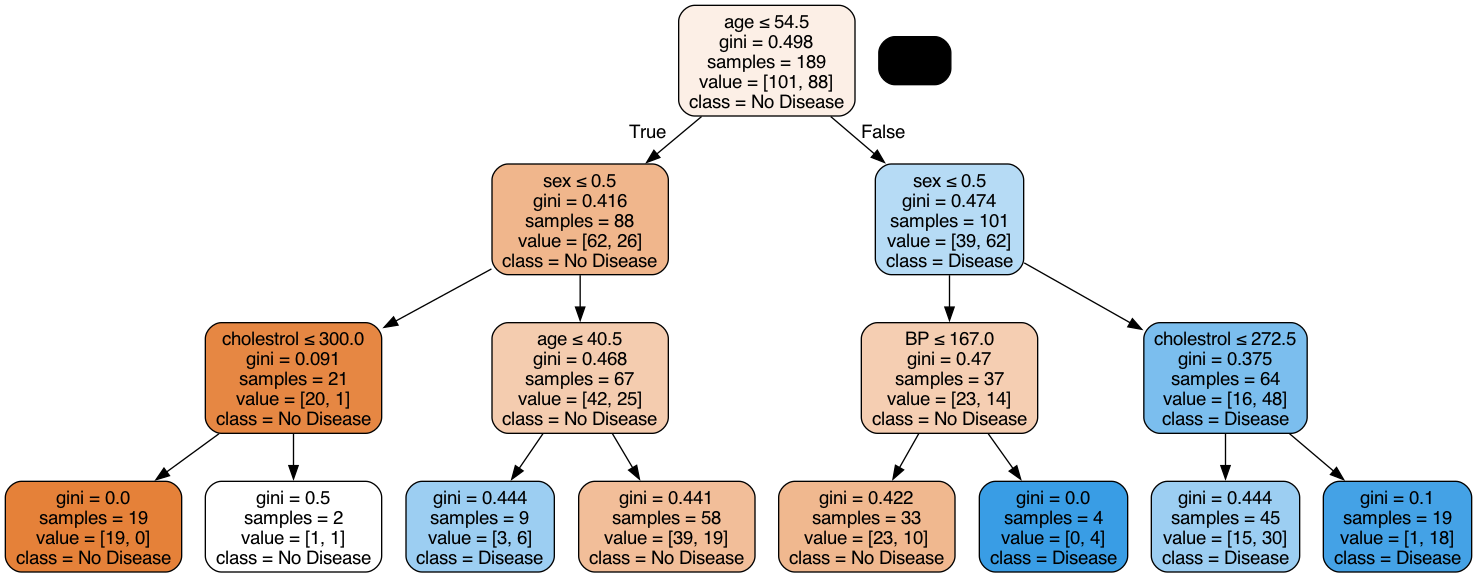

In [72]:
grph_depth = get_dt_graph(dt_depth)
Image(grph_depth.create_png())


In [73]:
evaluate_model(dt_depth)

Train Accuracy:  0.7407407407407407
Test Accuracy:  0.6049382716049383

Train Confusion Matrix
[[82 19]
 [30 58]]

Test Confusion Matrix
[[35 14]
 [18 14]]


We observe how the train accuracy and test accuracy drop. So may be not the right hyperparamter to tune

Specifying the min samples before split


In [74]:
dt_min_samples_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_samples_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

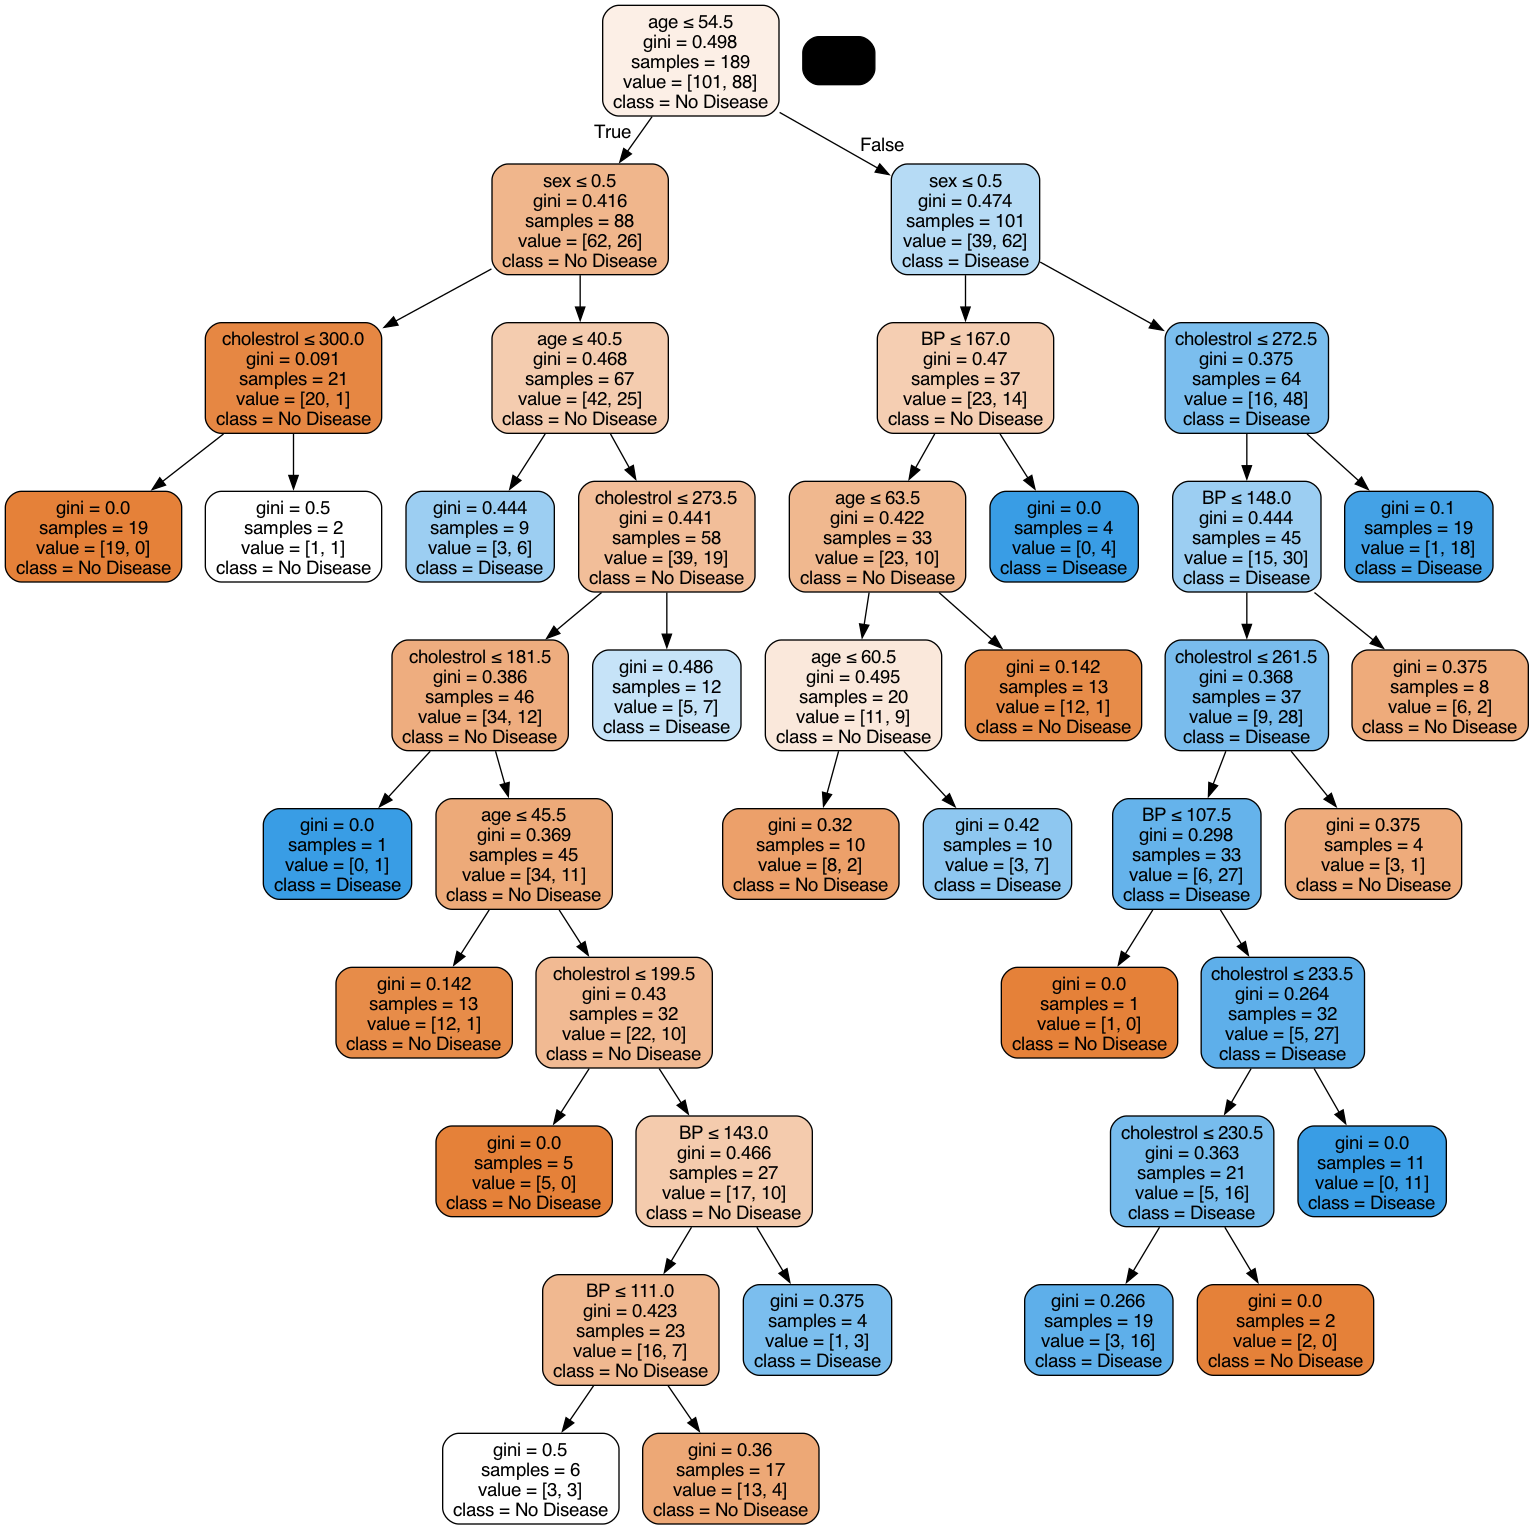

In [75]:
grph_min_samples_split = get_dt_graph(dt_min_samples_split)
Image(grph_min_samples_split.create_png())

In [76]:
evaluate_model(dt_min_samples_split)

Train Accuracy:  0.8359788359788359
Test Accuracy:  0.6419753086419753

Train Confusion Matrix
[[85 16]
 [15 73]]

Test Confusion Matrix
[[32 17]
 [12 20]]


We don't observe a huge increase in test accuracy, and also we see that some of the leaf nodes have 1,2 data point in them

Specifying the min samples at leaf

In [77]:
dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_samples_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

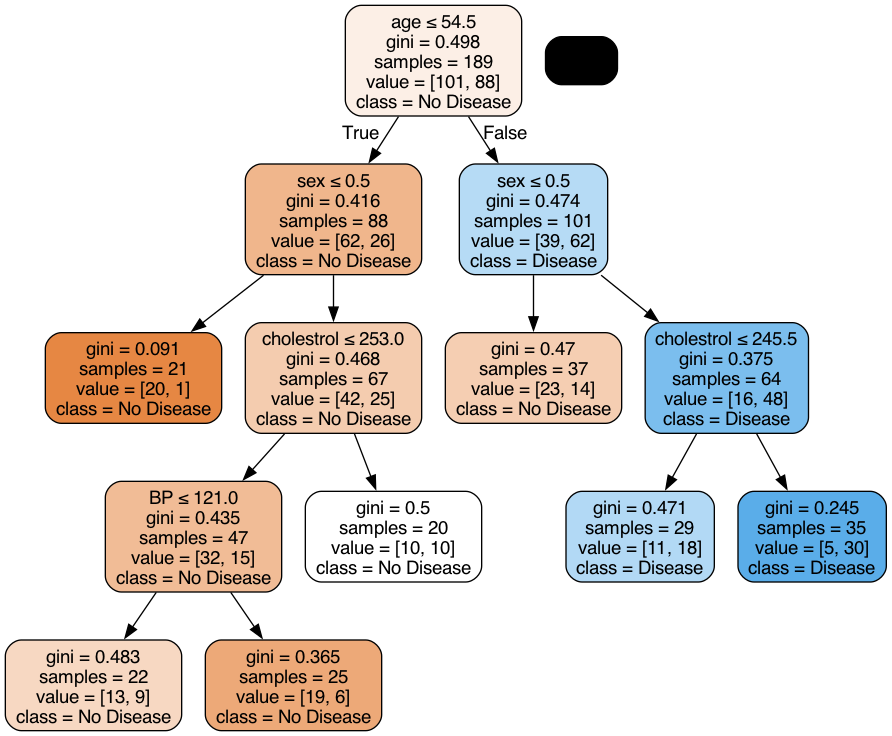

In [78]:
grph_min_samples_leaf = get_dt_graph(dt_min_samples_leaf)
Image(grph_min_samples_leaf.create_png())

In [79]:
evaluate_model(dt_min_samples_leaf)

Train Accuracy:  0.7037037037037037
Test Accuracy:  0.6419753086419753

Train Confusion Matrix
[[85 16]
 [40 48]]

Test Confusion Matrix
[[38 11]
 [18 14]]


Here is the least observed difference between train and test accuracy

Let's try using the above with Entropy instead of Gini

In [80]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion='entropy')
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

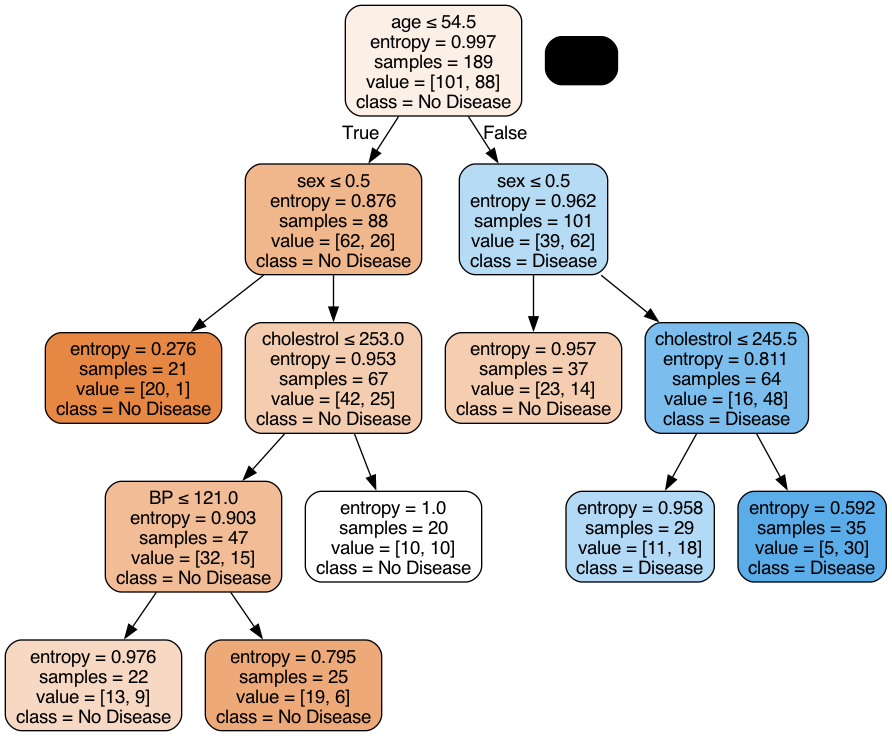

In [81]:
grph_min_leaf_entropy = get_dt_graph(dt_min_leaf_entropy)
Image(grph_min_leaf_entropy.create_png())

In [82]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy:  0.7037037037037037
Test Accuracy:  0.6419753086419753

Train Confusion Matrix
[[85 16]
 [40 48]]

Test Confusion Matrix
[[38 11]
 [18 14]]


As you can see we don't observe much difference in tree and evaluation when we use entropy over Gini

#### Hyperparameter tuning using Grid Search CV to do K-fold validation

In [83]:
dt = DecisionTreeClassifier(random_state=42)

In [84]:
from sklearn.model_selection import GridSearchCV    

In [85]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5,10,20,50,100]
}


In [86]:
grid_search = GridSearchCV(estimator=dt, 
            param_grid=params, 
            cv=5, 
            n_jobs=-1,
            verbose=1,
            scoring="accuracy")

In [87]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
CPU times: user 192 ms, sys: 15.5 ms, total: 207 ms
Wall time: 338 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [88]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.009276      0.003342         0.002207        0.001136   
1       0.003610      0.001291         0.001526        0.000480   
2       0.001958      0.001251         0.000869        0.000408   
3       0.002191      0.000911         0.001802        0.000575   
4       0.002931      0.000627         0.001862        0.000586   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                      5   
2            gini               2                      5   
3            gini               2                      5   
4            gini               2                      5   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
1                      10  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
2                      20  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
3                      50  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
4                     100  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.657895           0.710526           0.684211           0.710526   
1           0.657895           0.710526           0.684211           0.710526   
2           0.657895           0.710526           0.684211           0.710526   
3           0.657895           0.710526           0.684211           0.710526   
4           0.631579           0.684211           0.605263           0.631579   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.702703         0.693172        0.020090                4  
1           0.702703         0.693172        0.020090                4  
2           0.702703         0.693172        0.020090                4  
3           0.702703         0.693172        0.020090                4  
4           0.675676         0.645661        0.029717               95

In [89]:
cv_results.nlargest(5, 'mean_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
175       0.000755      0.000304         0.000340        0.000045   
176       0.001252      0.001273         0.000335        0.000024   
177       0.000584      0.000017         0.000312        0.000002   
0         0.009276      0.003342         0.002207        0.001136   
1         0.003610      0.001291         0.001526        0.000480   

    param_criterion param_max_depth param_min_samples_leaf  \
175         entropy               5                      5   
176         entropy               5                      5   
177         entropy               5                      5   
0              gini               2                      5   
1              gini               2                      5   

    param_min_samples_split  \
175                       5   
176                      10   
177                      20   
0                         5   
1                        10   

                                                params  split0_test_score  \
175  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.684211   
176  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.684211   
177  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.684211   
0    {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.657895   
1    {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.657895   

     split1_test_score  split2_test_score  split3_test_score  \
175           0.763158           0.736842           0.657895   
176           0.763158           0.736842           0.657895   
177           0.763158           0.736842           0.605263   
0             0.710526           0.684211           0.710526   
1             0.710526           0.684211           0.710526   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
175           0.675676         0.703556        0.039741                1  
176           0.675676         0.703556        0.039741                1  
177           0.702703         0.698435        0.053974                3  
0             0.702703         0.693172        0.020090                4  
1             0.702703         0.693172        0.020090                4

In [90]:
grid_search.best_score_

0.703556187766714

In [91]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [92]:
dt_best = grid_search.best_estimator_

In [93]:
evaluate_model(dt_best)

Train Accuracy:  0.7936507936507936
Test Accuracy:  0.6419753086419753

Train Confusion Matrix
[[87 14]
 [25 63]]

Test Confusion Matrix
[[35 14]
 [15 17]]


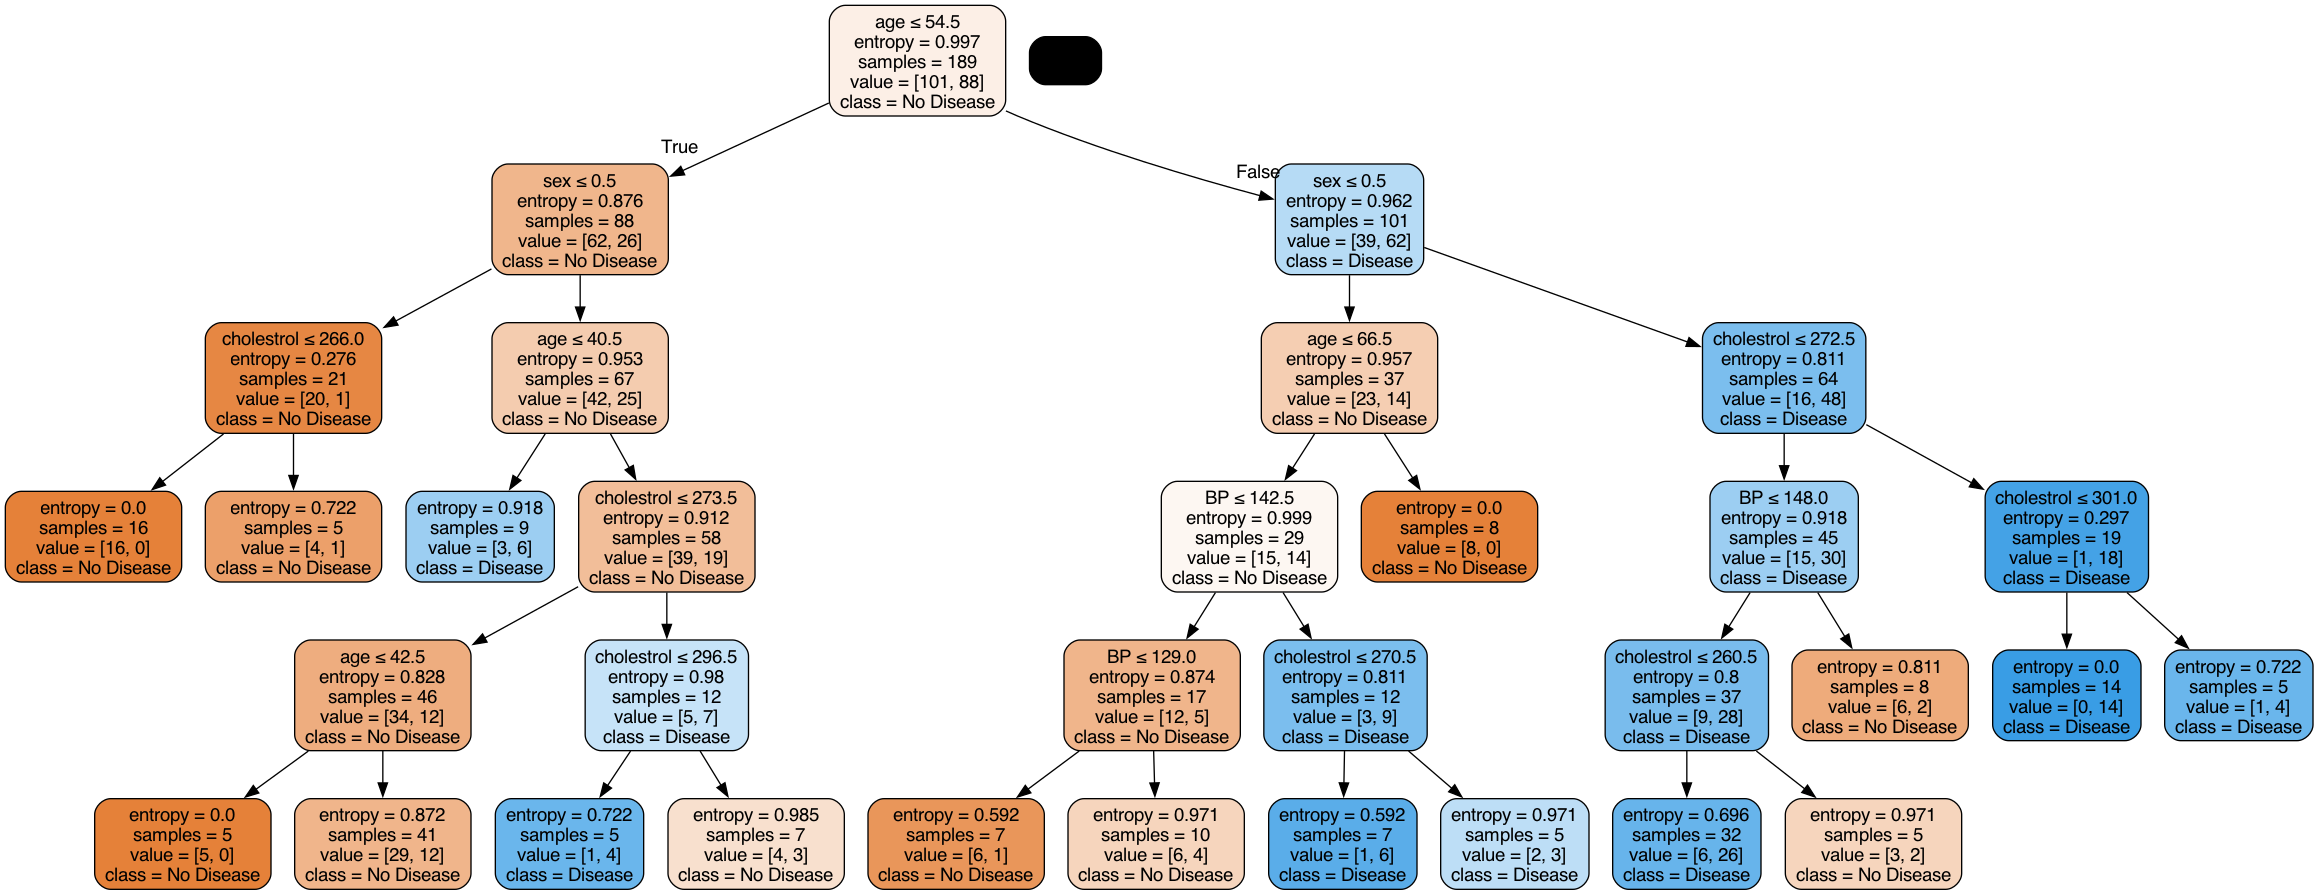

In [94]:
grph_best = get_dt_graph(dt_best)
Image(grph_best.create_png())

#### Using Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
X_train.head()

age  sex   BP  cholestrol
84    57    1  110         201
251   44    1  130         219
92    54    1  124         266
201   58    1  125         300
126   62    1  120         267

In [97]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [98]:
# n_estimators is the number of trees in the forest
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)

In [99]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [100]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [103]:
sample_tree = rf.estimators_[4]

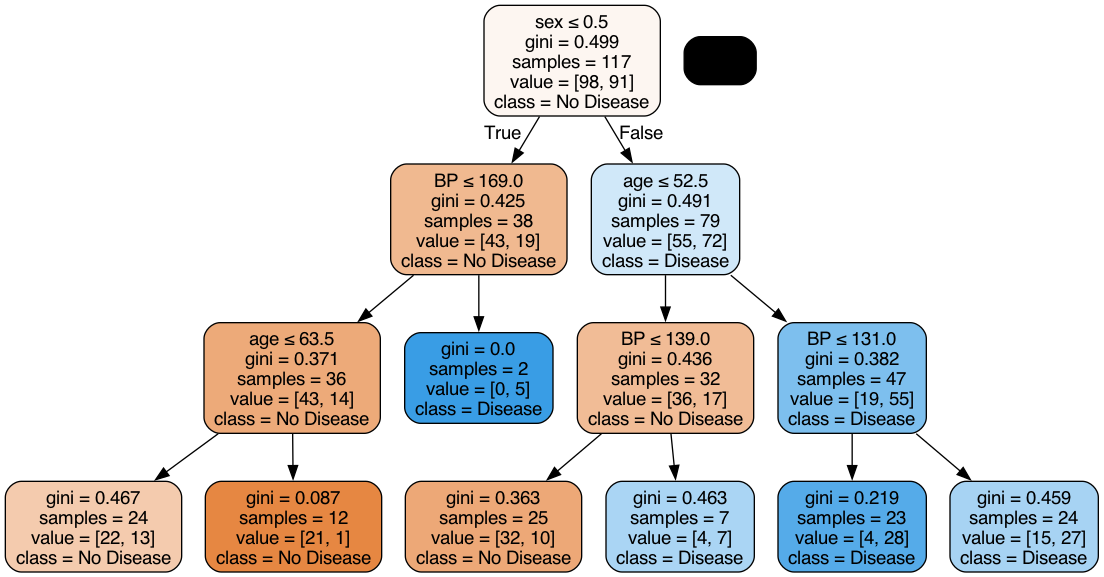

In [104]:
grp4 = get_dt_graph(sample_tree)
Image(grp4.create_png())

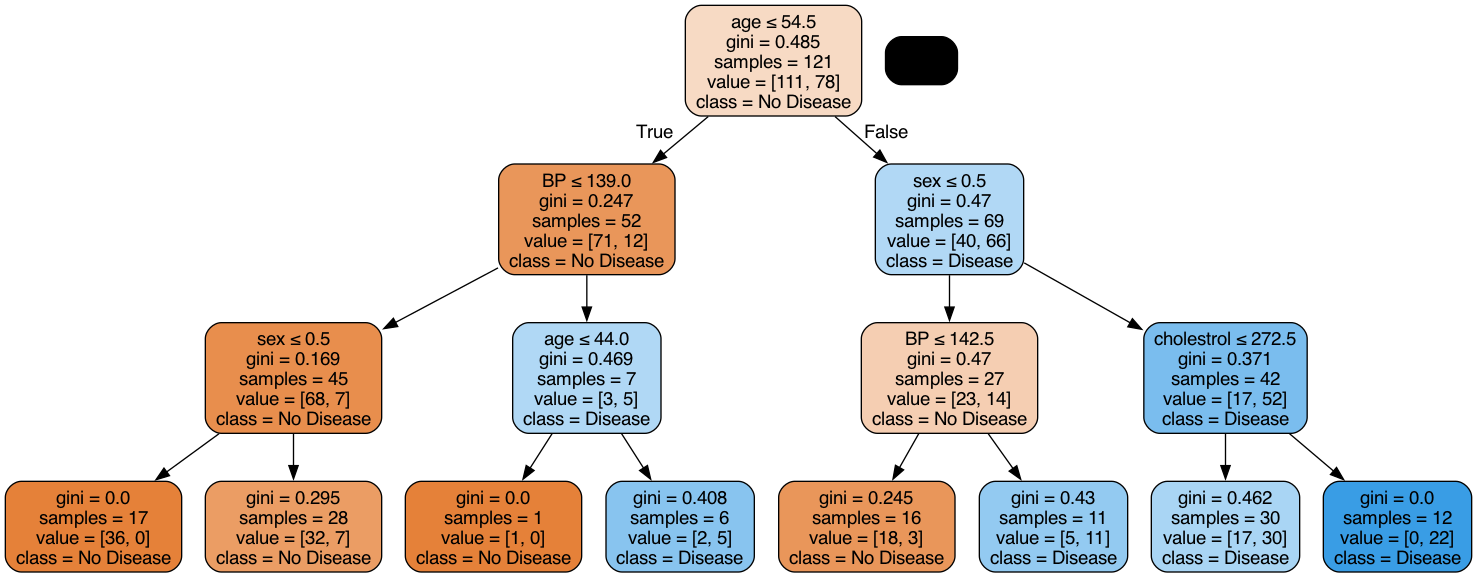

In [105]:
sample_tree8 = rf.estimators_[8]

grp8 = get_dt_graph(sample_tree8)
Image(grp8.create_png())

##### OOB Score

In [106]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [107]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [108]:
rf.oob_score_

0.6349206349206349

#### Grid search for hyper-parameter tuning

In [136]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [146]:
# Create the parameter grid based on the results of random search

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'max_features': [2, 3, 4],
    'n_estimators': [10, 20, 30, 50, 100, 200]
}

In [147]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=classifier_rf, 
            param_grid=params, 
            cv=6, 
            n_jobs=-1,
            verbose=1,
            scoring="accuracy")

In [148]:
%%time
grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 450 candidates, totalling 2700 fits
CPU times: user 669 ms, sys: 68.6 ms, total: 738 ms
Wall time: 32.4 s


GridSearchCV(cv=6, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 20, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [149]:
rf_best = grid_search.best_estimator_

In [150]:
rf_best

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [151]:
evaluate_model(rf_best)

Train Accuracy:  0.8042328042328042
Test Accuracy:  0.691358024691358

Train Confusion Matrix
[[82 19]
 [18 70]]

Test Confusion Matrix
[[37 12]
 [13 19]]


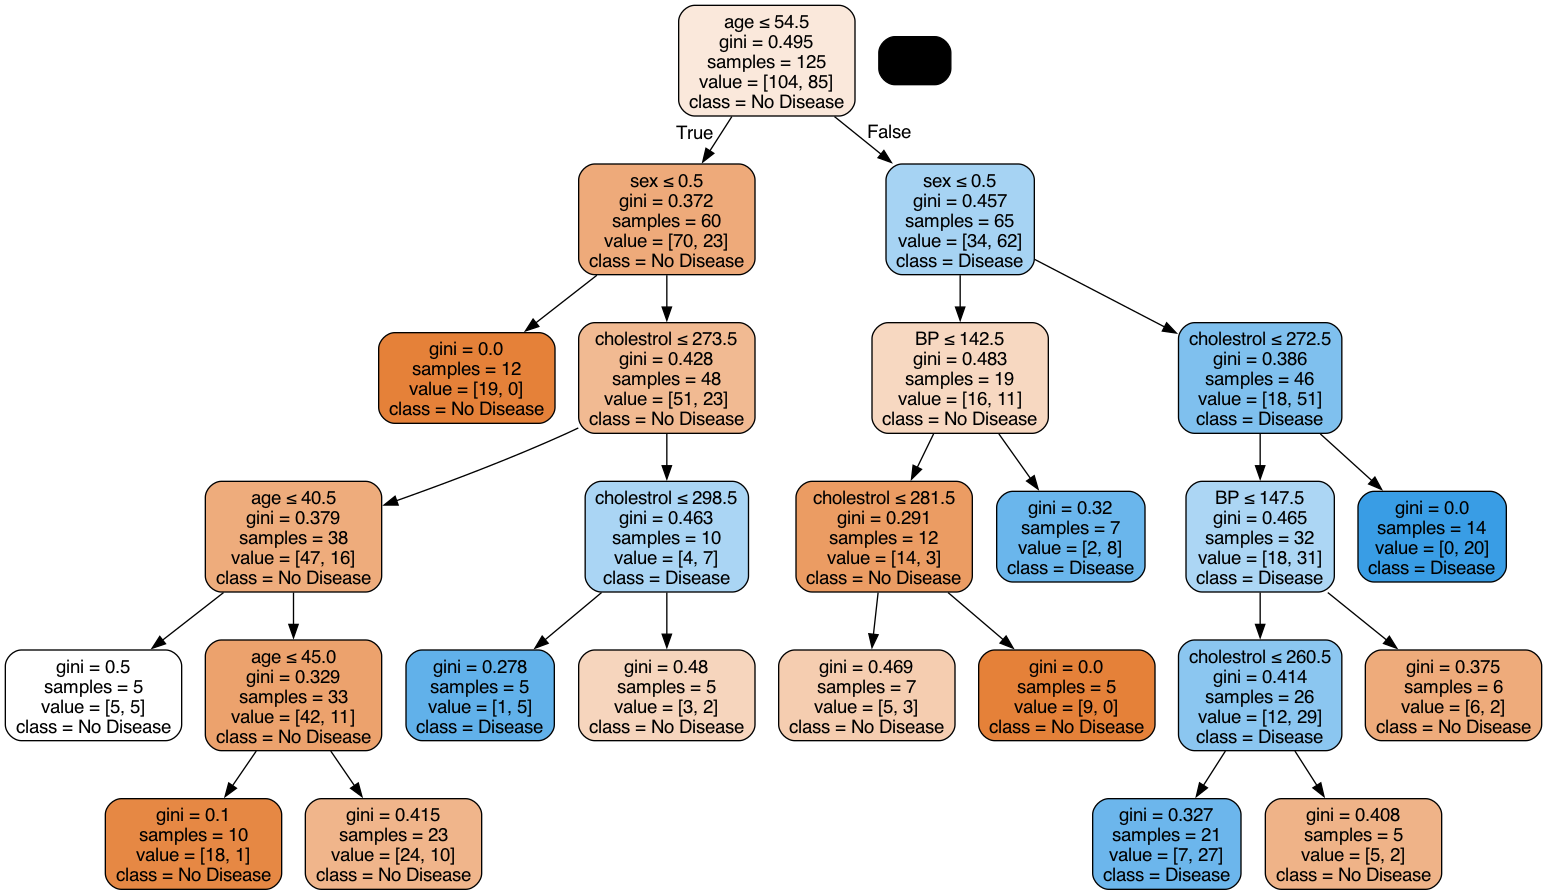

In [152]:
sample_tree_rf = rf_best.estimators_[0]

grp_rf = get_dt_graph(sample_tree_rf)
Image(grp_rf.create_png())

#### Variable importance in RandomForest and Decision trees

In [153]:
rf_best.feature_importances_

array([0.39213098, 0.16681275, 0.17543738, 0.26561889])

In [154]:
pd.DataFrame({'feature': X.columns, 'importance': rf_best.feature_importances_}).sort_values('importance', ascending=False)

feature  importance
0         age    0.392131
3  cholestrol    0.265619
2          BP    0.175437
1         sex    0.166813